In [11]:
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt



In [12]:
df = pd.read_csv('/content/drive/MyDrive/tata_dataset.csv.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-09-06,462.700012,463.700012,456.600006,457.750000,456.327759,9805875
1,2022-09-07,453.200012,456.500000,443.649994,445.850006,444.464752,20764508
2,2022-09-08,452.450012,452.549988,440.000000,442.200012,440.826080,19336014
3,2022-09-09,447.500000,449.649994,440.600006,445.899994,444.514587,14294289
4,2022-09-12,447.700012,453.000000,447.000000,451.000000,449.598724,8962633
...,...,...,...,...,...,...,...
244,2023-08-30,611.200012,612.900024,605.000000,605.549988,605.549988,5676055
245,2023-08-31,608.799988,609.650024,599.049988,601.000000,601.000000,10544271
246,2023-09-01,604.200012,614.900024,601.900024,611.200012,611.200012,10297492
247,2023-09-04,615.599976,615.599976,606.000000,609.000000,609.000000,8392665


In [13]:

df.shape

(249, 7)

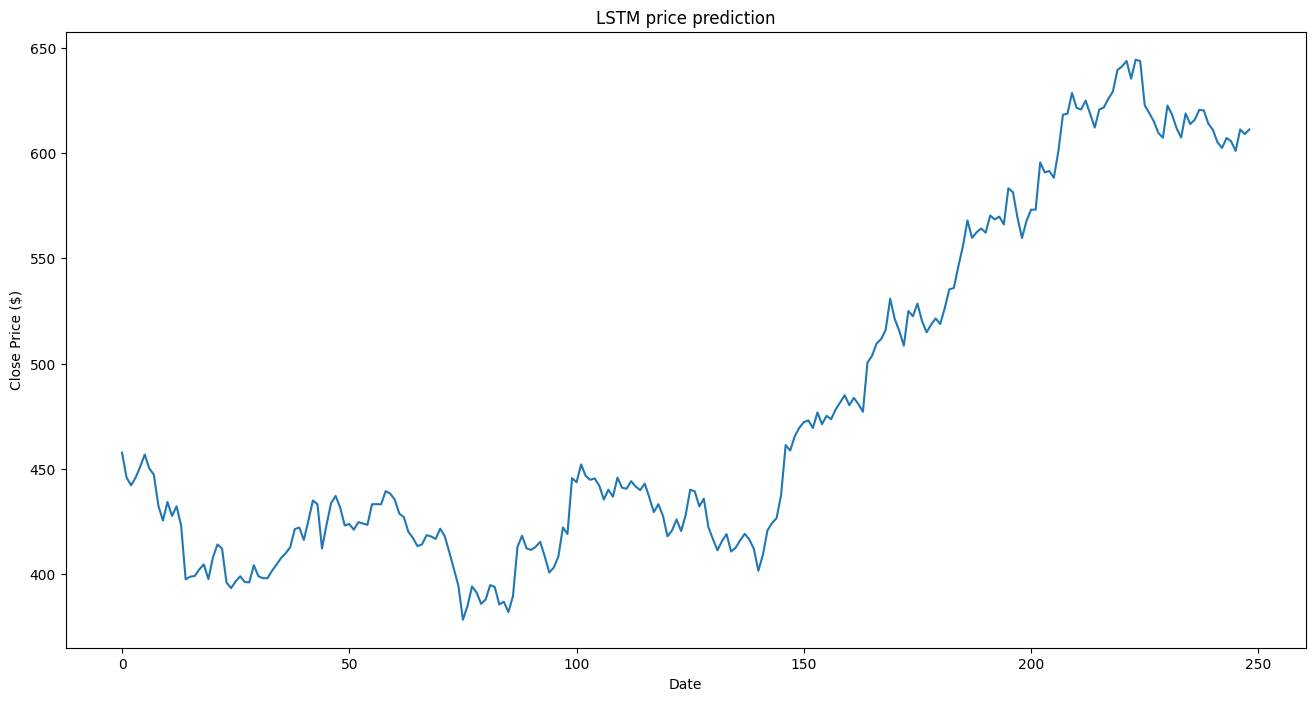

In [14]:

plt.figure(figsize=(16,8))
plt.title('LSTM price prediction')
plt.xlabel('Date')
plt.ylabel('Close Price ($)')
plt.plot(df["Close"])
plt.show()

In [15]:

data=df.filter(['Close'])
dataset=data.values


In [16]:

training_data_len =math.ceil(len(dataset)*0.8)
training_data_len

200

In [17]:

scaler=MinMaxScaler(feature_range=(0,1))
scaled_data =scaler.fit_transform(dataset)
scaled_data

array([[0.29855236],
       [0.25380712],
       [0.24008276],
       [0.25399508],
       [0.27317164],
       [0.29498021],
       [0.27016361],
       [0.25907125],
       [0.20360969],
       [0.17710099],
       [0.21018988],
       [0.18537316],
       [0.20248171],
       [0.16826472],
       [0.072006  ],
       [0.07689409],
       [0.07802219],
       [0.0898665 ],
       [0.09870277],
       [0.07256999],
       [0.11111107],
       [0.13442377],
       [0.12709152],
       [0.06617788],
       [0.05640158],
       [0.06843385],
       [0.07764616],
       [0.06730587],
       [0.06674187],
       [0.09738671],
       [0.07783412],
       [0.07426208],
       [0.07407401],
       [0.08742245],
       [0.0985147 ],
       [0.11035912],
       [0.11863128],
       [0.12934761],
       [0.16168454],
       [0.16469258],
       [0.14250798],
       [0.17672496],
       [0.21300996],
       [0.20605374],
       [0.1272796 ],
       [0.16976874],
       [0.20812186],
       [0.221

In [18]:
train_data=scaled_data[0:training_data_len , :]
x_train =[]
y_train =[]

for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<60:
    print(x_train)
    print(y_train)
    print()


In [19]:
x_train,y_train=np.array(x_train),np.array(y_train)

In [22]:

x_train =np.reshape(x_train, newshape= (x_train.shape[0],x_train.shape[1], 1))
x_train.shape

(140, 60, 1)

In [23]:

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [24]:
model.compile(optimizer='adam', loss='mean_squared_error')


In [25]:
model.fit(x_train, y_train, epochs=1, batch_size=1)


140/140 [==============================] - 15s 58ms/step - loss: 0.0070


In [26]:
test_data=scaled_data[training_data_len - 60: , :]
x_test=[]
y_test=dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])



In [27]:
x_test =np.array(x_test)


In [28]:
x_test= np.reshape(x_test,(x_test.shape[0], x_test.shape[1],1))


In [29]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

2/2 [==============================] - 1s 20ms/step


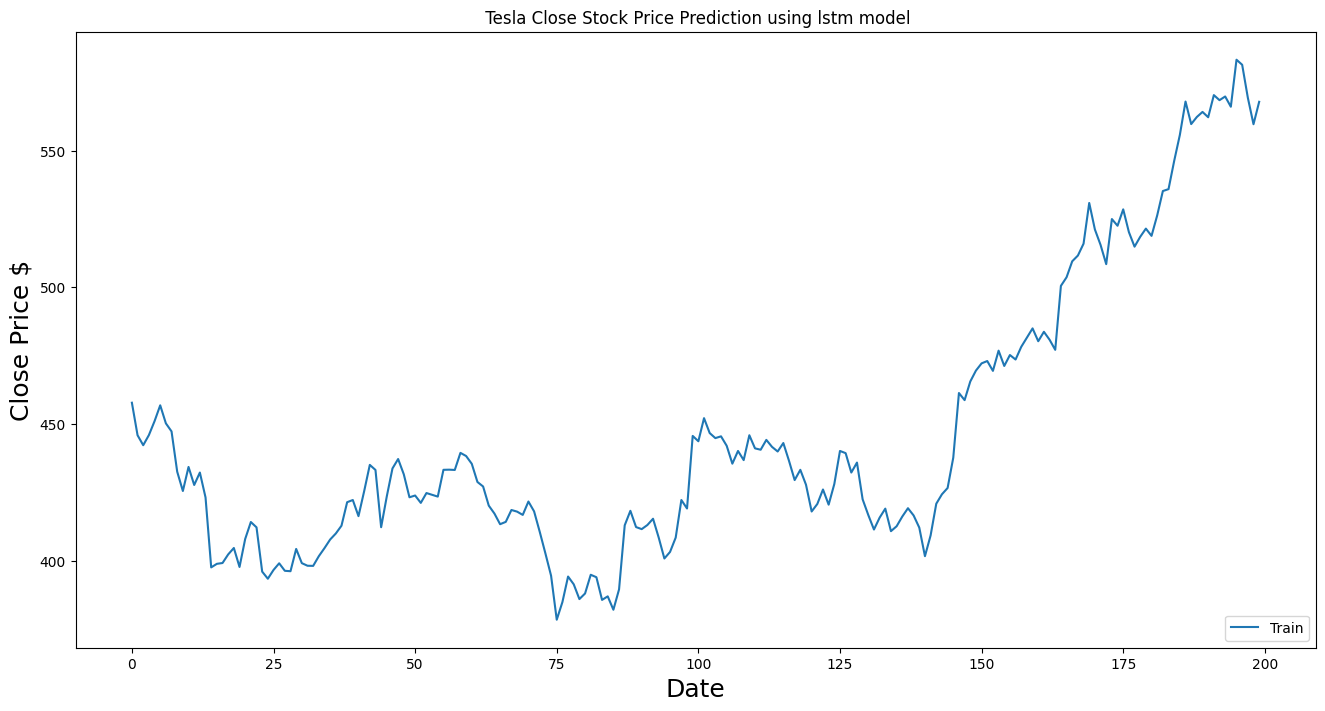

In [30]:
train=data[:training_data_len]
valid=data[training_data_len:]


plt.figure(figsize=(16,8))
plt.title(' Tesla Close Stock Price Prediction using lstm model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price $',fontsize=18)
plt.plot(train['Close'])

plt.legend(['Train', 'Val', 'Prediction'],loc ='lower right')
plt.show()